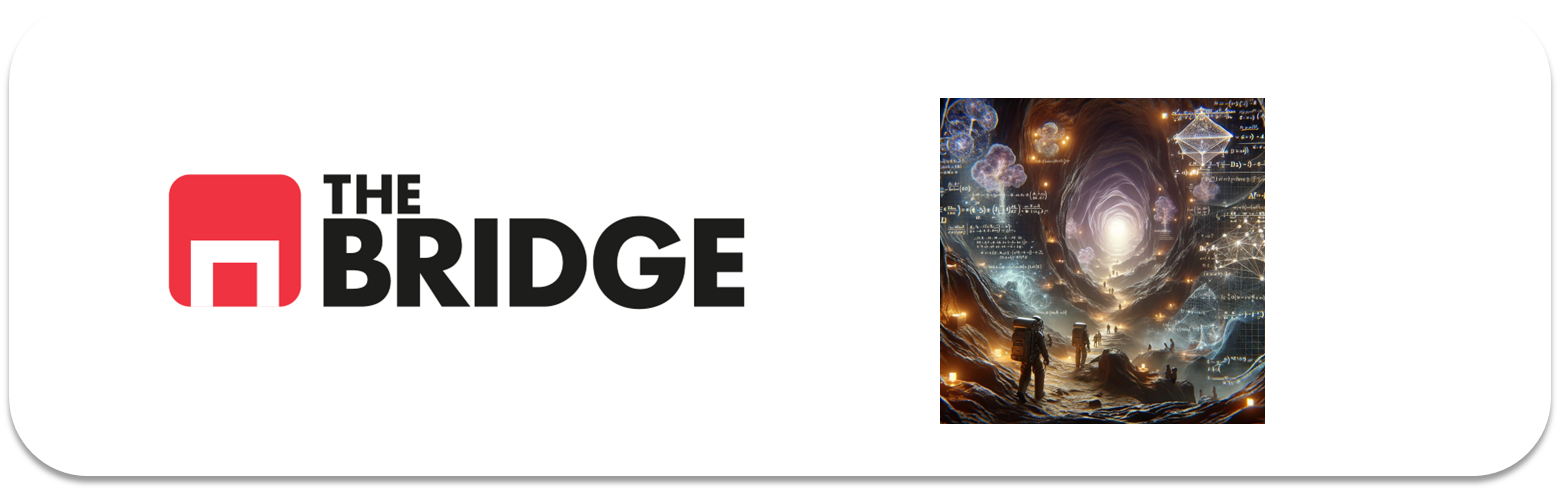

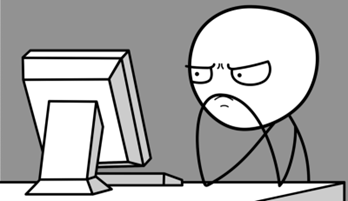

Para ejercitarte y afianzar lo aprendido sobre **Keras y DL**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### Predecir eficiencia de gasolina

En este conjuntos de ejercicios vamos a trabajar sobre el set de datos clasico [Auto MPG](https://archive.ics.uci.edu/ml/datasets/auto+mpg) para construir un modelo DL para predecir el consumo de vehiculos de 1970 y 1980. Para hacer esto proveeremos el modelo con una descripcion de muchos automoviles de ese periodo. Esta descripcion incluye atributos como: Cilindros, desplazamiento, potencia y peso.

El objetivo de este ejercicio es predecir el target miles per galon (MPG), que vendría a representar las millas por galón de combustible.

Para la construcción del modelo vamos a utilizar Keras.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import pandas as pd
import numpy as np
import Toolbox_datascience as tds
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt



### Ejercicio 1

Carga los datos en un dataframe, utilizando como nombre de columnas los siguientes:

```python
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight', 'Acceleration', 'Model Year', 'Origin']
``` 


In [290]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight', 'Acceleration', 'Model Year', 'Origin']

df = pd.read_csv("./data/Autos_data.txt",
                 delim_whitespace=True,
                 header=None,
                 names=column_names)
df.head()

C:\Users\rodri\AppData\Local\Temp\ipykernel_11752\2295163698.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv("./data/Autos_data.txt",


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


### Ejercicio 2: Limpieza inicial

Echa un primer vistazo. Limpia columnas "raras". Deshazte de nulos (cuidado aquí), arregla el tipo de las features numéricas si fuera necesario. Haz una lista de las features categóricas que tuvieramos que convertir posteriormente. (Es antes del split pero no importa para este ejercicio)

In [291]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 398 entries, 18.0 to 31.0
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    int64  
 1   Cylinders     398 non-null    float64
 2   Displacement  398 non-null    object 
 3   Horsepower    398 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    int64  
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 28.0+ KB


In [292]:
#pd.set_option('display.max_rows', None)
df.Displacement.value_counts()

Displacement
150.0    22
90.00    20
88.00    19
110.0    18
100.0    17
75.00    14
95.00    14
105.0    12
70.00    12
67.00    12
65.00    10
97.00     9
85.00     9
80.00     7
145.0     7
140.0     7
92.00     6
68.00     6
78.00     6
84.00     6
?         6
72.00     6
180.0     5
71.00     5
86.00     5
115.0     5
130.0     5
60.00     5
170.0     5
175.0     5
83.00     4
120.0     4
76.00     4
165.0     4
52.00     4
190.0     3
125.0     3
215.0     3
48.00     3
63.00     3
112.0     3
225.0     3
96.00     3
69.00     3
74.00     3
129.0     2
98.00     2
198.0     2
53.00     2
81.00     2
79.00     2
153.0     2
58.00     2
62.00     2
87.00     2
46.00     2
160.0     2
155.0     2
139.0     2
66.00     1
149.0     1
132.0     1
64.00     1
116.0     1
77.00     1
89.00     1
142.0     1
135.0     1
138.0     1
133.0     1
103.0     1
107.0     1
108.0     1
102.0     1
220.0     1
113.0     1
200.0     1
210.0     1
193.0     1
54.00     1
208.0     1
137.0     1
158

In [293]:
df = df[df['Displacement'] != '?']

In [294]:
df['Displacement'] = df['Displacement'].astype('float64')

In [295]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 18.0 to 31.0
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           392 non-null    int64  
 1   Cylinders     392 non-null    float64
 2   Displacement  392 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        392 non-null    float64
 5   Acceleration  392 non-null    int64  
 6   Model Year    392 non-null    int64  
 7   Origin        392 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 27.6+ KB


In [296]:
feaures_num = ["Cylinders","Displacement","Horsepower","Weight",]
features_cat = ["Origin","MPG","Model Year","Acceleration"]

c:\Users\rodri\Git_Repositories\ONLINE_DS_THEBRIDGE_ROD\Sprint_16\Unidad_02\Ejercicios_Workout\Toolbox_datascience.py:433: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=col, bins=bins, kde=kde, ax=ax, hue=df[hue] if hue else None, palette='coolwarm')
c:\Users\rodri\Git_Repositories\ONLINE_DS_THEBRIDGE_ROD\Sprint_16\Unidad_02\Ejercicios_Workout\Toolbox_datascience.py:433: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=col, bins=bins, kde=kde, ax=ax, hue=df[hue] if hue else None, palette='coolwarm')
c:\Users\rodri\Git_Repositories\ONLINE_DS_THEBRIDGE_ROD\Sprint_16\Unidad_02\Ejercicios_Workout\Toolbox_datascience.py:433: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=col, bins=bins, kde=kde, ax=ax, hue=df[hue] if hue else None, palette='coolwarm')
c:\Users\rodri\Git_Repositories\ONLINE_DS_THEBRIDGE_ROD\Sprint_16\Unidad_02\

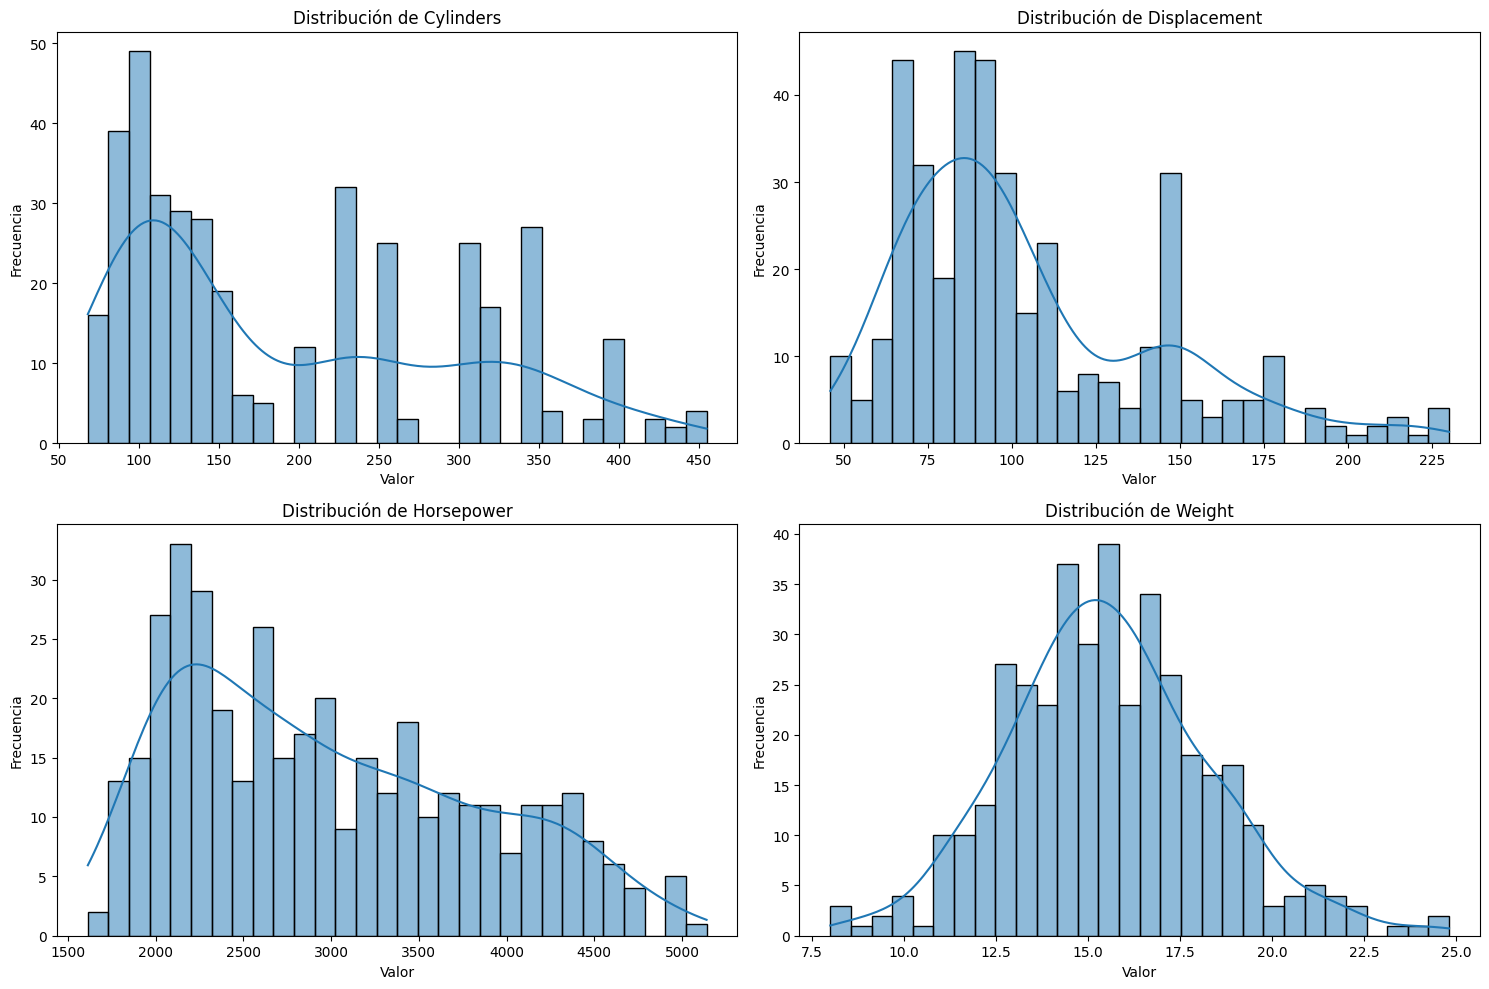

In [297]:
tds.pinta_distribucion_numericas(df,feaures_num)

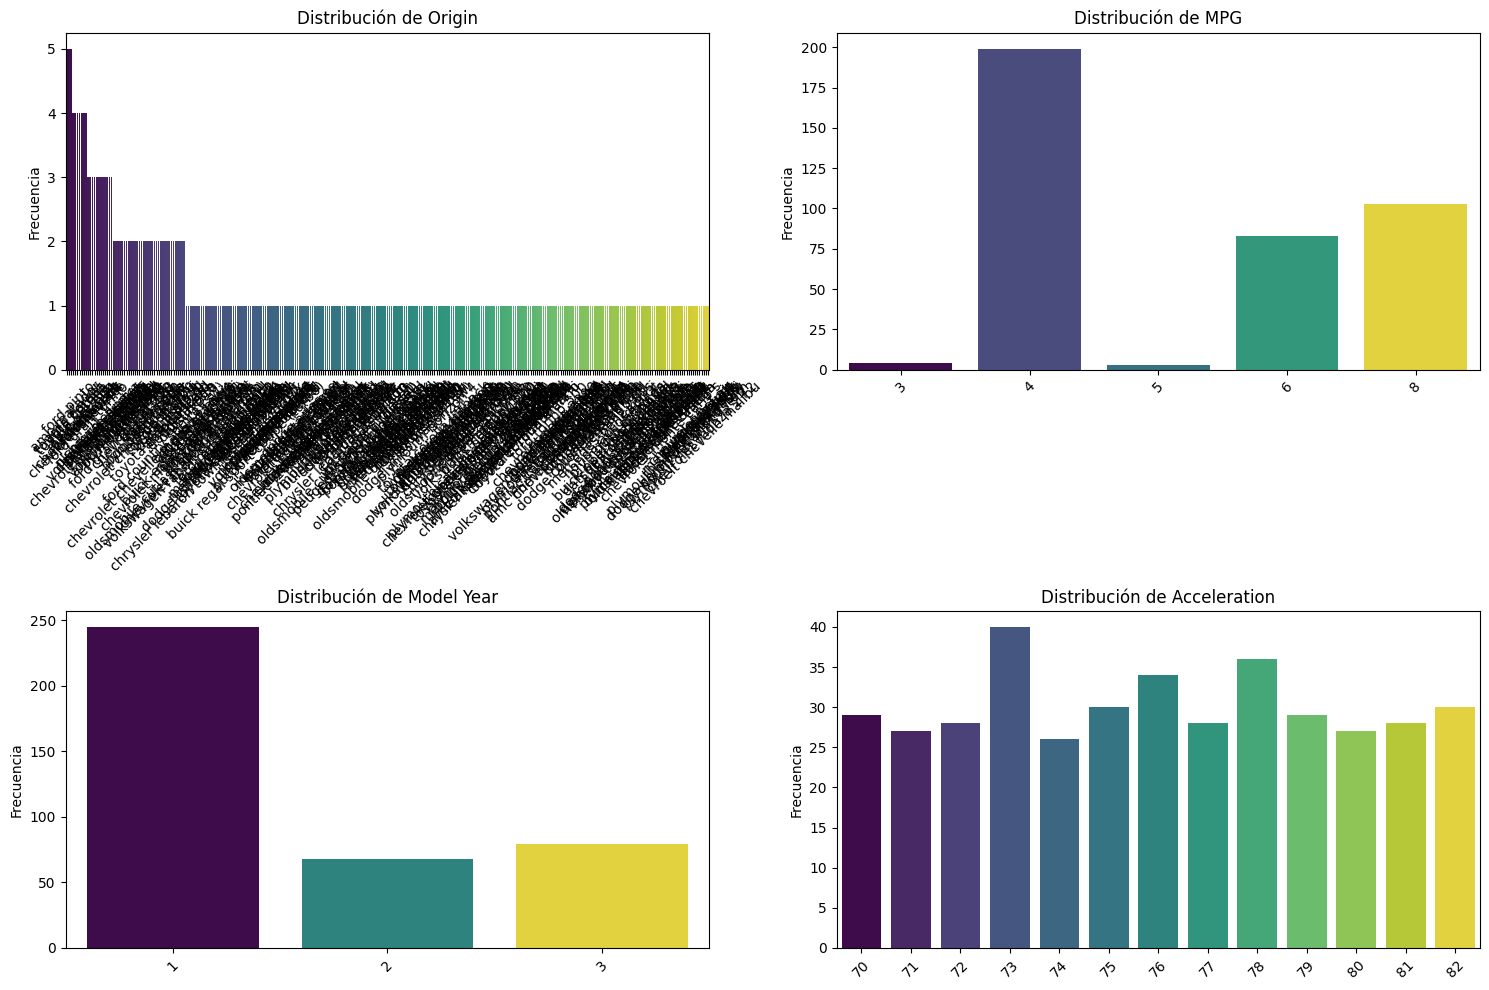

In [298]:
tds.pinta_distribucion_categoricas(df,features_cat)

### Ejercicio 3

Antes de seguir nos informan que las etiquetas de "origin" correspoden a  USA para el 1, Europa para el 2 y Japón para el 3. Convierte origin a esos valores porque queremos tener el literal. Luego haz directamente un one-hot encoding de esas variable.  

*NOTA: Realmente los one-hot-encoding se pueden hacer contra el dataset original desde el principio (no afectan unos a otros), si nos los hacemos es porque hasta que no se han analizado las variables puede que no tengamos claro que queremos hacer si una codificación ordinal, una vectorización (onehot) o bien queremos hacer otro cambio en la variable y esos vienen dados por la relación de la categórica con el target y por tanto sólo se pueden ver en el train. Pero si por lo que sea sabemos seguros que vamos a hacer vectorización no hay problema en hacerlo antes del split. Por otro lado, siempre conviene quedarse con una categoria unkown para valores que pueden llegar en el futuro antes de un recalibrado.*


In [299]:
df.Origin.value_counts()

Origin
amc matador                             5
ford pinto                              5
toyota corolla                          5
toyota corona                           4
amc hornet                              4
chevrolet chevette                      4
chevrolet impala                        4
amc gremlin                             4
peugeot 504                             4
ford maverick                           4
ford gran torino                        3
honda civic                             3
chevrolet caprice classic               3
dodge colt                              3
volkswagen dasher                       3
plymouth duster                         3
chevrolet citation                      3
chevrolet nova                          3
pontiac catalina                        3
plymouth fury iii                       3
ford galaxie 500                        3
chevrolet vega                          3
buick century                           2
volkswagen rabbit          

In [300]:
def clasificador_origin(Origin):
    if 'chevrolet' in Origin or 'buick' in Origin or 'plymouth' in Origin or 'amc' in Origin or 'ford' in Origin or 'pontiac' in Origin or 'dodge' in  Origin or 'chevy' in Origin or 'mercury' in Origin  or 'oldsmobile' in Origin or 'chrysler' in Origin or 'pickup' in Origin:
        return 'USA'
    elif 'toyota' in Origin or 'datsun' in Origin or 'mazda' in Origin or 'hi' in Origin or 'maxda' in Origin or 'honda' in Origin  or 'subaru' in Origin or 'nissan' in Origin:
        return 'Japon'
    else:
        return 'Europa'
    
df['Origin_encoded'] = df['Origin'].apply(clasificador_origin)

In [301]:
df

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Origin_encoded
18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,USA
15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,USA
18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,USA
16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,USA
17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,USA
15.0,8,429.0,198.0,4341.0,10.0,70,1,ford galaxie 500,USA
14.0,8,454.0,220.0,4354.0,9.0,70,1,chevrolet impala,USA
14.0,8,440.0,215.0,4312.0,8.5,70,1,plymouth fury iii,USA
14.0,8,455.0,225.0,4425.0,10.0,70,1,pontiac catalina,USA
15.0,8,390.0,190.0,3850.0,8.5,70,1,amc ambassador dpl,USA


In [302]:
from sklearn.preprocessing import OneHotEncoder

# Suponemos que 'df' ya contiene la columna 'Origin_encoded' con valores literales ("USA", "Europa", "Japón")
df = df.copy()  # Evitamos el SettingWithCopyWarning

# Creamos el codificador one-hot. Con sparse_output=False obtenemos un array denso.
encoder = OneHotEncoder(sparse_output=False)

# Ajustamos y transformamos la columna 'Origin_encoded'. Es necesario pasarla como array 2D.
origin_encoded_array = encoder.fit_transform(df[['Origin_encoded']])

# Obtenemos los nombres de las nuevas columnas generadas
nuevas_columnas = encoder.get_feature_names_out(['Origin_encoded'])

# Creamos un DataFrame con el one-hot encoding y mantenemos el mismo índice
df_ohe = pd.DataFrame(origin_encoded_array, columns=nuevas_columnas, index=df.index)

# Concatenamos el DataFrame original con el DataFrame de one-hot encoding
df_final = pd.concat([df, df_ohe], axis=1)

# Si se desea, eliminamos la columna original 'Origin_encoded'
df_final = df_final.drop(columns=['Origin_encoded', 'Origin'])

df_final.head()


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin_encoded_Europa,Origin_encoded_Japon,Origin_encoded_USA
18.0,8,307.0,130.0,3504.0,12.0,70,1,0.0,0.0,1.0
15.0,8,350.0,165.0,3693.0,11.5,70,1,0.0,0.0,1.0
18.0,8,318.0,150.0,3436.0,11.0,70,1,0.0,0.0,1.0
16.0,8,304.0,150.0,3433.0,12.0,70,1,0.0,0.0,1.0
17.0,8,302.0,140.0,3449.0,10.5,70,1,0.0,0.0,1.0


### Ejercicio 4

Divide los datos en train y test. Ahora divida el set de datos en un set de entrenamiento y otro de pruebas. 80% para entrenamiento

Usaremos el set de pruebas en la evaluacion final de nuestro modelo. Emplea una variable target para guardar el nombre de la columna target.

NOTA: El resultado tienen que ser dos datasets

In [303]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Supongamos que 'df' es tu DataFrame completo.
# Define el nombre de la columna objetivo. Por ejemplo, si "MPG" es la variable a predecir:
target = "MPG"

# Separa las características (X) de la variable objetivo (y)
X = df_final.drop(columns=[target])
y = df_final[target]

# Divide el dataset en 80% entrenamiento y 20% prueba.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Combina las características y el target para obtener dos DataFrames completos
train_set = pd.concat([X_train, y_train], axis=1)
test_set = pd.concat([X_test, y_test], axis=1)




### Ejercicio 5

Inspecciona los datos. Revisa rápidamente la distribución conjunta del dataset de entrenamiento mediante un grid de gráficos

c:\Users\rodri\Git_Repositories\ONLINE_DS_THEBRIDGE_ROD\Sprint_16\Unidad_02\Ejercicios_Workout\Toolbox_datascience.py:433: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=col, bins=bins, kde=kde, ax=ax, hue=df[hue] if hue else None, palette='coolwarm')
c:\Users\rodri\Git_Repositories\ONLINE_DS_THEBRIDGE_ROD\Sprint_16\Unidad_02\Ejercicios_Workout\Toolbox_datascience.py:433: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=col, bins=bins, kde=kde, ax=ax, hue=df[hue] if hue else None, palette='coolwarm')
c:\Users\rodri\Git_Repositories\ONLINE_DS_THEBRIDGE_ROD\Sprint_16\Unidad_02\Ejercicios_Workout\Toolbox_datascience.py:433: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=col, bins=bins, kde=kde, ax=ax, hue=df[hue] if hue else None, palette='coolwarm')
c:\Users\rodri\Git_Repositories\ONLINE_DS_THEBRIDGE_ROD\Sprint_16\Unidad_02\

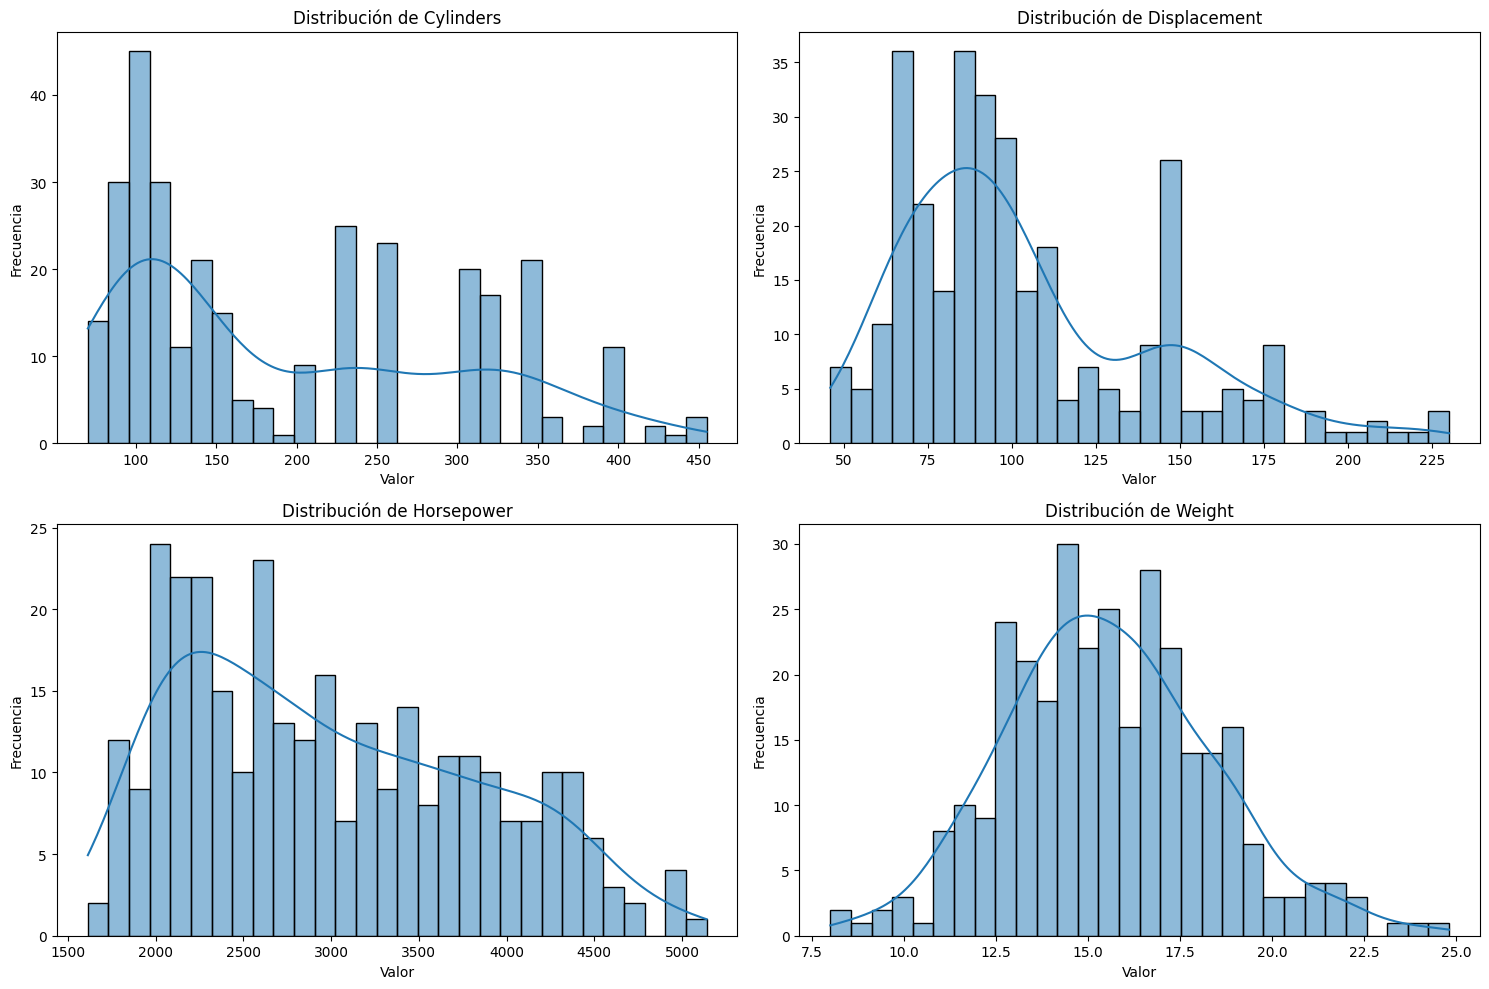

In [304]:

tds.pinta_distribucion_numericas(X_train,feaures_num)

### Ejercicio 6 

Independientemente de lo que hayas encontrado en el análisis anterior, vamos a utilizar todas las features y antes las vamos a escalar. Estandardiza train y test.

In [305]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 313 entries, 18.6 to 11.0
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Cylinders              313 non-null    float64
 1   Displacement           313 non-null    float64
 2   Horsepower             313 non-null    float64
 3   Weight                 313 non-null    float64
 4   Acceleration           313 non-null    int64  
 5   Model Year             313 non-null    int64  
 6   Origin_encoded_Europa  313 non-null    float64
 7   Origin_encoded_Japon   313 non-null    float64
 8   Origin_encoded_USA     313 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 24.5 KB


In [306]:
from sklearn.preprocessing import StandardScaler

# Creamos copias para modificar solo las features numéricas
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# Creamos el objeto StandardScaler
scaler = StandardScaler()

# Ajustamos el scaler sobre las columnas numéricas del conjunto de entrenamiento
# y transformamos también el conjunto de prueba
X_train_scaled[feaures_num] = scaler.fit_transform(X_train[feaures_num])
X_test_scaled[feaures_num] = scaler.transform(X_test[feaures_num])


In [307]:
X_train_scaled.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin_encoded_Europa,Origin_encoded_Japon,Origin_encoded_USA
18.6,0.284578,0.141429,0.754803,1.121759,78,1,0.0,0.0,1.0
25.0,-0.535880,-0.329499,-0.493129,-0.228940,76,1,1.0,0.0,0.0
18.0,-0.236655,-0.198685,-0.002530,-0.371118,75,1,0.0,0.0,1.0
15.0,1.182255,1.187934,1.368052,-0.726565,72,1,0.0,0.0,1.0
39.0,-1.057113,-1.062052,-1.323099,0.304231,81,1,0.0,0.0,1.0


## El modelo

### Ejercicio 7: Construye el modelo con Keras

Construyamos nuestro modelo. Aquí, utilizaremos un modelo `secuencial` con dos capas ocultas densamente conectadas y una capa de salida que devuelve un único valor continuo. Es decir una MLP con dos capas ocultas.

Por tanto, tendrá tres capas. Una inicial con activación relu (usa el argumento `input_shape` para darle el número de features). Otra hidden layer con activación relu y la de salida de regresión, que se compondrá de una única neurona. Pon las neuronas que consideres interesantes para las dos primeras capas (NOTA: En este caso partimos de pocas features, por lo que puede ser interesante poner 2 o 3 como mínimo el número de features para poder obtener unas pseudofeatures que intenten capturar las interrelaciones.)

Otros datos:

Para el compile utiliza un loss='mse'.

optimizer = `tf.keras.optimizers.RMSprop(0.001)`

Y en metrics añade en una lista el `mae` y `mse`.

Utiliza una aproximación en prisma (mismo numero de unidades en las capas ocultas)

In [308]:
X_train_scaled.shape[1]

9

In [310]:
# Y una forma mediante encademaniento de funciones (usando lo que se denomina la Functional API)
input_layer = keras.layers.Input(shape = (9,))
flatten_layer = keras.layers.Flatten()(input_layer)
hidden_1 = keras.layers.Dense(18, activation = "relu")(flatten_layer)
hidden_2 = keras.layers.Dense(9, activation = "relu")(hidden_1)
output = keras.layers.Dense(1, activation = "softmax")(hidden_2)
model = keras.Model(inputs = [input_layer], outputs = [output])

In [311]:
model.compile(
    loss='mse',
    optimizer=tf.keras.optimizers.RMSprop(0.001),
    metrics=['mae', 'mse']
)

### Ejercicio 8

Inspecciona el modelo usando el método `.summary` para imprimir una descripción simple del modelo

In [312]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 9)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 9)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 18)             │           180 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 9)              │           171 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            10 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 361 (1.41 KB)

 Trainable params: 361 (1.41 KB)

 Non-trainable params: 0 (0.00 B)

### Ejercicio 9 Entrenar el modelo

Entrena el modelo para 1000 epochs y guarda los resultados del entrenamiento en una variable llamada `history`.
Emplea en el entrenamiento un 20% de los datos para validación, mediante el argumento `validation_split`.

In [322]:
# Entrenamos el modelo con un batch_size de 64 imágenes por cada iteración, 15 epochs y especificando cuál es el conjunto de validación.
print("Fit model on training data")
history = model.fit(
    X_train_scaled,
    y_train,
    batch_size=64, # numero de muestras empleadas en el entrenamiento de SGD
    epochs=1000,
    validation_split=0.2 # 1 por defecto. Insuficiente. Numero de vueltas del backpropagation
    # We pass some validation for
    # monitoring validation loss and metrics
    # at the end of each epoch
    # En vez de validation data podemos usar el argumento validation_split=0.
)

Fit model on training data
Epoch 1/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 23.8250 - mae: 4.5698 - mse: 23.8250 - val_loss: 20.2222 - val_mae: 4.1905 - val_mse: 20.2222
Epoch 2/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 22.7625 - mae: 4.4573 - mse: 22.7625 - val_loss: 20.2222 - val_mae: 4.1905 - val_mse: 20.2222
Epoch 3/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 24.2610 - mae: 4.6172 - mse: 24.2610 - val_loss: 20.2222 - val_mae: 4.1905 - val_mse: 20.2222
Epoch 4/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 23.6552 - mae: 4.5583 - mse: 23.6552 - val_loss: 20.2222 - val_mae: 4.1905 - val_mse: 20.2222
Epoch 5/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 23.9615 - mae: 4.5844 - mse: 23.9615 - val_loss: 20.2222 - val_mae: 4.1905 - val_mse: 20.2222
Epoch 6/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 23.6281 - mae: 4.5563 - mse: 23.6281 - val_loss: 20.2222 - val_mae: 4.1905 - val_mse: 20.2222
Epoch 7/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - lo

### Ejercicio 10

Visualiza el progreso de entrenamiento del modelo usando las estadísticas almacenadas en el objeto `history`. Muestra la evolución del error en train y validation por un lado, y la evolución de la pérdida (loss), también train contra validation, en otra.

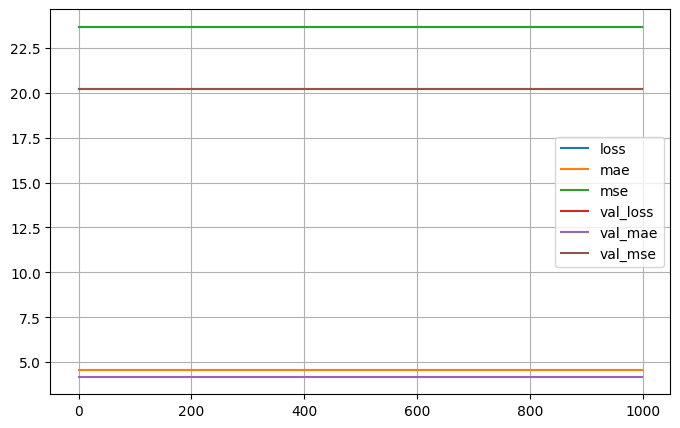

In [324]:
import pandas as pd
import matplotlib.pyplot as plt

# Podemos ver como evoluciona el entrenamiento, en funcion de los epochs
# Validacion y training estan muy cerca, no hay overfitting!
# Todavia no ha acabado de coverger ya que el loss en validacion sigue bajando,
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
#plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

### Ejercicio 11

Comenta las gráficas anteriores.

### Ejercicio 12

Independientemente de lo comentado en 11, vamos a añadir un callback al entrenamiento. Para ello, construye el modelo otra vez y vuelve a compilarlo (si no lo haces, como ya sabes comenzará el entrenamiento donde lo dejó y no nos valdrá el callback para nada). Entrena el modelo con los mismos hiperparámetros del ejercicio 10 y pinta la gráfica de evolución de los errores e interprétalo (obten el MAE medio una vez "estabilizado" el entrenamiento).  

Para el earlystopping utiliza un margen de 20 epochs.

Interpreta el gráfico

### Ejercicio 13

Veamos qué tan bien generaliza el modelo al usar el conjunto de **test**. Esto nos dice qué tan bien podemos esperar que el modelo prediga cuándo lo usamos en el mundo real. Utiliza el método `evaluate` con los datos de test normalizados y sus labels.

Con el método evaluate devolverá tres valores: loss, mae y mse.

In [325]:
# Obtenemos el "score" a partir del conjunto de test
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")

# Metodo evaluate para que nos de el error vs las metricas elegidas en la funcion compile
results = model.evaluate(X_test_scaled, y_test)
print("test loss, test acc:", results)

Evaluate on test data
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 21.5538 - mae: 4.3324 - mse: 21.5538
test loss, test acc: [22.607595443725586, 4.430379867553711, 22.607595443725586]


### Ejercicio 14

Dibuja en un scatter plot las predicciones de test vs sus true labels.

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


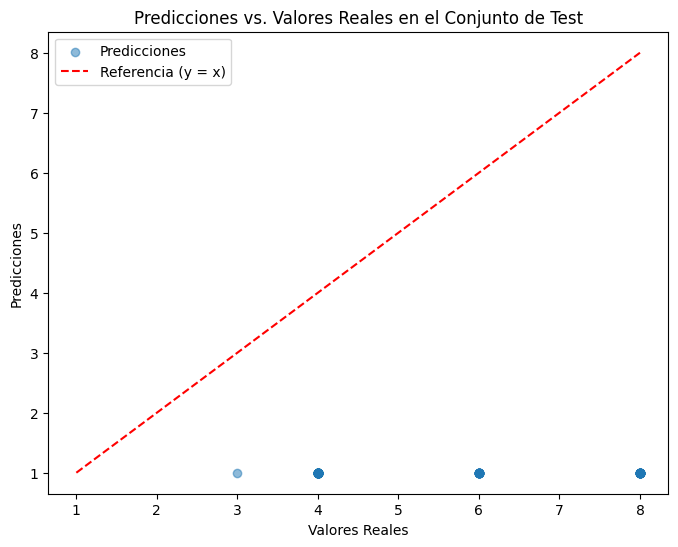

In [327]:
import matplotlib.pyplot as plt

# Obtén las predicciones para el conjunto de test escalado
predictions = model.predict(X_test_scaled)

plt.figure(figsize=(8,6))
plt.scatter(y_test, predictions, alpha=0.5, label='Predicciones')
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Predicciones vs. Valores Reales en el Conjunto de Test")

# Dibuja la línea de referencia (y = x)
limites = [min(y_test.min(), predictions.min()), max(y_test.max(), predictions.max())]
plt.plot(limites, limites, color='red', linestyle='--', label='Referencia (y = x)')

# Agrega la leyenda
plt.legend()
plt.show()
